In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os 

In [ ]:
train_path = '/content/drive/MyDrive/Covid19_Minor_Project/CovidDataset/Train'
val_path = '/content/drive/MyDrive/Covid19_Minor_Project/CovidDataset/Val'

In [ ]:
# re-size all the images to a size VGG-16 expects.
IMAGE_SIZE = [224, 224]

# Set the batch size
BATCH_SIZE = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 10
LEARNING_RATE = 1e-3
NUM_CLASSES = 2 # We are aware of it.
classes=["Covid",  "Normal"]

In [ ]:
import os
CLASSES = os.listdir(train_path)
NUM_CLASSES = len(CLASSES)

In [ ]:
print("Class --> {} \n and the length is : {}".format(CLASSES, NUM_CLASSES))

Class --> ['Covid', 'Normal'] 
 and the length is : 2


In [ ]:
# Image Data Augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [ ]:
# Import the images from the train dataset.
# Make sure to provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle=True, 
    classes=classes,
)

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
val_set = val_datagen.flow_from_directory(
    directory = val_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle=True, 
    classes=classes,

)

In [ ]:
# Import the VGG 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(NUM_CLASSES, activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
history = model.fit(
  training_set,
  validation_data=val_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/15
16/16 [==============================] - 85s 5s/step - loss: 0.7487 - accuracy: 0.6550 - val_loss: 0.3012 - val_accuracy: 0.8716
Epoch 2/15
16/16 [==============================] - 12s 773ms/step - loss: 0.3845 - accuracy: 0.8361 - val_loss: 0.2636 - val_accuracy: 0.8807
Epoch 3/15
16/16 [==============================] - 12s 774ms/step - loss: 0.2856 - accuracy: 0.8721 - val_loss: 0.2513 - val_accuracy: 0.8899
Epoch 4/15
16/16 [==============================] - 12s 779ms/step - loss: 0.2309 - accuracy: 0.9088 - val_loss: 0.2340 - val_accuracy: 0.8991
Epoch 5/15
16/16 [==============================] - 12s 779ms/step - loss: 0.2416 - accuracy: 0.9096 - val_loss: 0.4641 - val_accuracy: 0.8257
Epoch 6/15
16/16 [==============================] - 12s 769ms/step - loss: 0.1863 - accuracy: 0.9362 - val_loss: 0.2095 - val_accuracy: 0.8991
Epoch 7/15
16/16 [==============================] - 12s 765ms/step - loss: 0.1736 - accuracy: 0.9463 - val_loss: 0.3594 - val_accuracy: 0.8716
Ep

In [ ]:
model.save('my_model.h5')

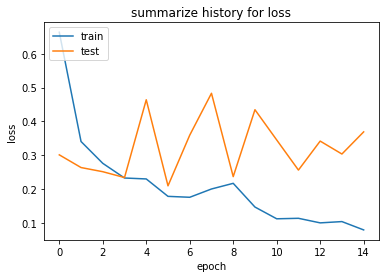

In [ ]:
# summarize history for loss

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation (Test) loss')
plt.title('summarize history for loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

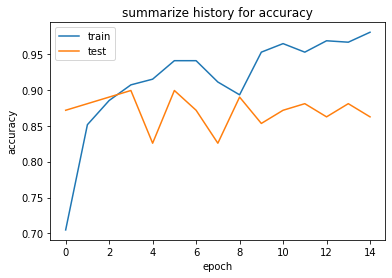

In [ ]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('summarize history for accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# get sample image to test.
img_normal = image.load_img('/content/drive/MyDrive/Covid19_Minor_Project/CovidDataset/Train/Normal/IM-0156-0001.jpeg', target_size = (224, 224))

In [ ]:
def model_predict(img, actual):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x_processed = preprocess_input(x)
    result = model.predict(x_processed)
    if(result[0][0]<.50):
        result="normal"
    else:
        result="corona positive"
        
    plt.figure()
    plt.imshow(img)
    plt.title('Actual : {} --> Predicted  : {}'.format(actual, result))
    
#     return result

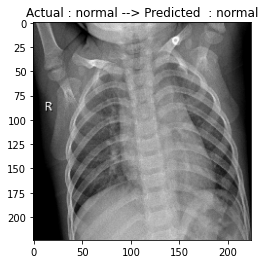

In [ ]:
pred_normal = model_predict(img_normal, "normal")

In [ ]:
model.evaluate(training_set)

16/16 [==============================] - 10s 636ms/step - loss: 0.0803 - accuracy: 0.9782


[0.08030955493450165, 0.9782178401947021]

In [ ]:
from keras.models import load_model
model=load_model('my_model.h5')

In [ ]:
training_set.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
test_path='/content/drive/MyDrive/Copy_Final_Project/Dataset/Test'

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_set = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle=True, 
    classes=classes,

)

Found 509 images belonging to 2 classes.


In [ ]:
import matplotlib.pyplot as plt
import itertools 

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix model')


Confusion Matrix model


Confusion matrix, without normalization


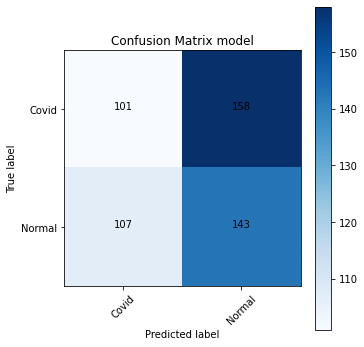

In [ ]:
cm = confusion_matrix(test_set.classes, y_pred)
# plot_confusion_matrix(cm, classes, title='Confusion Matrix model')
plot_confusion_matrix(cm, classes,False, title='Confusion Matrix model')

In [ ]:
scores = model.evaluate(val_set, steps=len(val_set))
print(scores)
print('Model accuracy: {}'.format(scores[1]*100))

4/4 [==============================] - 2s 442ms/step - loss: 0.3691 - accuracy: 0.8624
[0.3691067397594452, 0.8623853325843811]
Model accuracy: 86.23853325843811


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
print("Precision =",precision_score(test_set.classes,y_pred))
print("Recall =",recall_score(test_set.classes,y_pred))
print("F1 Score =",f1_score(test_set.classes,y_pred))

Precision = 0.4750830564784053
Recall = 0.572
F1 Score = 0.5190562613430126


In [ ]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

In [ ]:
# calculate the specificity
conf_specificity = (TN / float(TN + FP))
print("Specificity = ",conf_specificity)

Specificity =  0.38996138996138996
